In [1]:
from google.colab import files
uploaded = files.upload()


Saving loan.csv to loan.csv


In [2]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Step 2: Load Dataset
loan_df = pd.read_csv('loan.csv')

In [5]:
# Step 3: Data Preprocessing
loan_df.drop(['Loan_ID'], axis=1, inplace=True)  # Drop identifier
loan_df.dropna(inplace=True)  # Remove rows with missing values

In [6]:
# Step 4: Feature Encoding
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    loan_df[col] = le.fit_transform(loan_df[col])


In [7]:
# Step 5: Define Features and Target
X = loan_df.drop('Loan_Status', axis=1)
y = loan_df['Loan_Status']


In [8]:

# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 7: Model Training
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.8229166666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.59        28
           1       0.81      0.99      0.89        68

    accuracy                           0.82        96
   macro avg       0.87      0.71      0.74        96
weighted avg       0.84      0.82      0.80        96



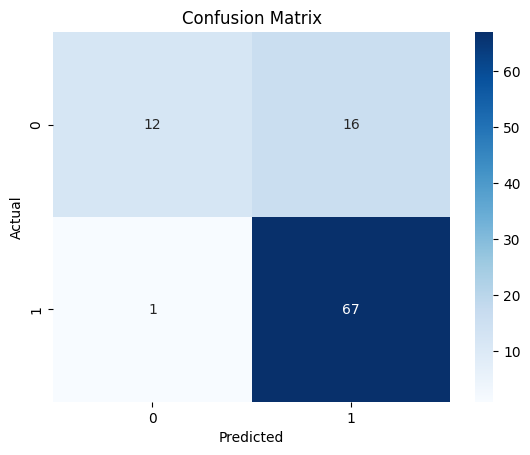

In [10]:
# Step 8: Prediction and Evaluation
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()